# Computational Modelling for Fly Motion Vision

I will use this notebook to get started with Computational Modelling for fly motion vision. Let's get started with designing a sine grating stimulus which moves over time in Preferred and Null Direction.

**Author : Abhishek Mishra**, Graduate Student, Borst Department, MPI Neurobiology, Munich 

In [1]:
#import necessary modules

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,5)

### Defining function for generating sine gratings moving over time in P.D. & N.D.

In [2]:
def sine_gratings(wavelength = 40.0, Amp =0.5, phase=0, dc=0.5,
                  visual_space_size=200.0,pixel=1.0,tot_time=10.0, dt=0.01, max_vel=40.0, PD_time=(1,4), ND_time=(5,8)):
    
    """ 
        
        Function to genrate moving sine wave gratings in Preferred & Null Direction
        Input parameters : wavelength (deg.), Amplitude, phase, dc, visual_space_size(deg.), pixel(deg.), 
                            tot_time(sec), dt(sec), max_vel, 
                            PD_time -- (PD start,PD_stop) (sec.), ND_time -- (ND_start, ND_stop) (sec.)
        Returns: sine gratings : stimulus_pattern"""
    
    x = np.arange(0, visual_space_size, pixel) # spatial axis x , dimension (visual_space_size/pixel,) unit degree
    t = np.arange(0, tot_time, dt) # time axis dimension (tot_time/dt,0) unit: sec
    xx, tt = np.meshgrid(x,t) #meshgrid of space and time (xx, tt .shape = (t.shape[0], x.shape[0]))
    
    vel = np.zeros((t.shape[0],x.shape[0])) # velocity array for velocities at 
                                            # different time points, dimension (1000,200)
    vel[int(PD_time[0]/dt):int(PD_time[1]/dt),:] = max_vel # P.D. motion from PD_time[0] sec to PD_time[1] sec
    vel[int(ND_time[0]/dt):int(ND_time[1]/dt),:] = -max_vel # N.D. motion from ND_time[0] sec to ND_time[1] sec
    
    gratings_pattern = Amp* np.sin((2*np.pi*(1/wavelength)*xx) - (2*np.pi* (vel/wavelength)*tt)+phase) + dc 
                                                # gratings_pattern.shape= (1000,200)
    
    plt.imshow(gratings_pattern, aspect = 'auto', origin = 'lower')#, extent = (0,x[-1],0,t[-1]))
    plt.title('Sine Gratings (Wavelength ' + str(wavelength)+' deg., '+'Velocity ' + str(max_vel) 
              + ' deg./sec) P.D., N.D.', fontsize = 18)
    plt.xlabel('x (Deg.)', fontsize = 15)
    plt.ylabel('time (sec.)', fontsize = 15)
    plt.savefig('Moving SineGratings.jpeg', dpi = 1000)
    plt.show()
    
    return gratings_pattern

#### Low Pass Filter

In [3]:
def lowpass_filter(x, tau=0.550,dt=0.01):
    y = np.zeros(len(x))
    alpha = dt / (tau+dt)
    y[0] = x[0]
    for i in np.arange(1,len(y)):
        y[i] = alpha*x[i] + (1-alpha)*y[i-1]
        
    return y

In [4]:
def highpass_filter(x, tau=0.550,dt=0.01):
    lp = lowpass_filter(x,tau)
    z = x- lp
        
    return z

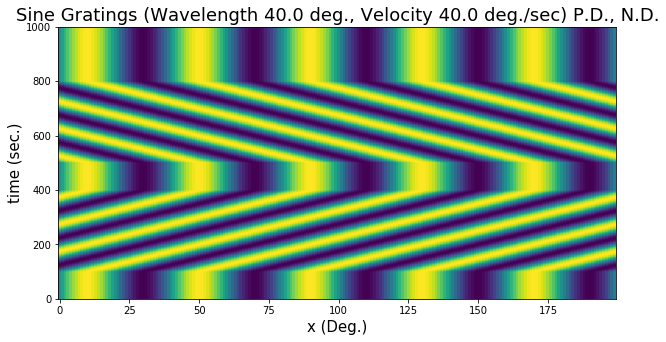

In [5]:
pattern = sine_gratings()

In [6]:
tau = 0.5
pattern_lowpass = np.apply_along_axis(lowpass_filter, 0, pattern, tau = 0.5, dt = 0.01)

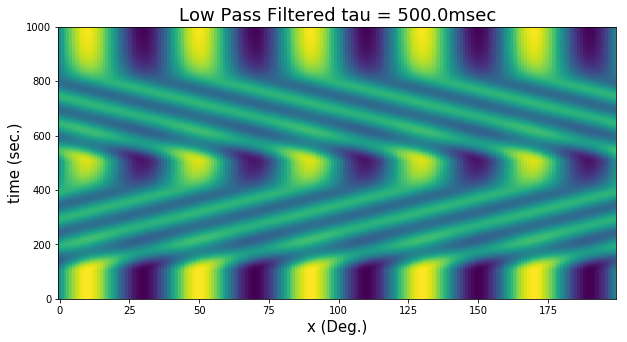

In [7]:
plt.imshow(pattern_lowpass, aspect = 'auto', origin = 'lower');#, extent = (0,x[-1],0,t[-1]));
plt.title('Low Pass Filtered tau = '+str(tau*1000)+'msec', fontsize = 18)
plt.xlabel('x (Deg.)', fontsize = 15)
plt.ylabel('time (sec.)', fontsize = 15)
plt.savefig('Low Pass Filtered.jpg', dpi = 1000)
plt.show()

In [8]:
tau = 0.5
pattern_highpass = np.apply_along_axis(highpass_filter, 0, pattern, tau = 0.5, dt = 0.01)

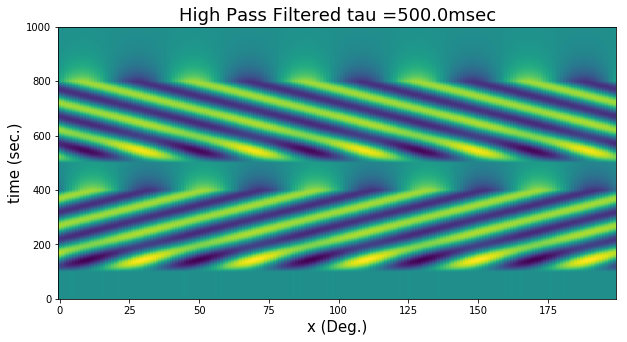

In [9]:
plt.imshow(pattern_highpass, aspect = 'auto', origin = 'lower');#, extent = (0,x[-1],0,t[-1]));
plt.title('High Pass Filtered tau ='+str(tau*1000)+'msec', fontsize = 18)
plt.xlabel('x (Deg.)', fontsize = 15)
plt.ylabel('time (sec.)', fontsize = 15)
plt.savefig('High Pass Filtered.jpg', dpi = 1000)
plt.show()

In [10]:
tot_time = 10; dt = 0.01; tau = 0.50
t = np.arange(0, tot_time, dt)
x = np.zeros(len(t)); x.shape
x[500:800] = 10
lowpass = lowpass_filter(x, tau = 0.5)
highpass = highpass_filter(x, tau=0.5)

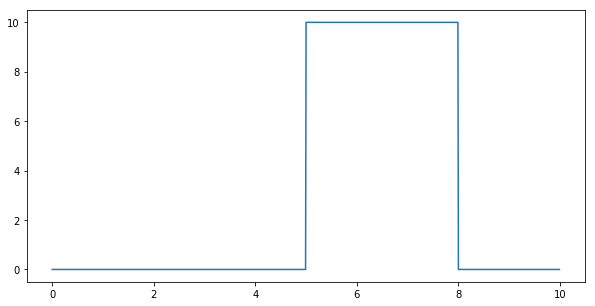

In [11]:
plt.plot(t,x)

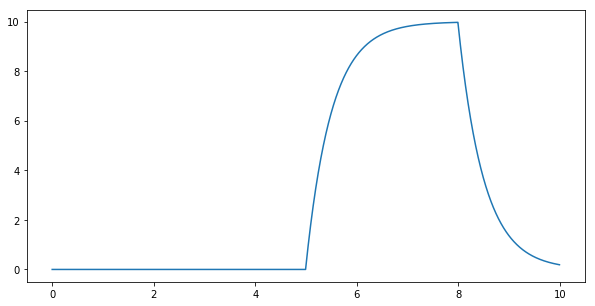

In [12]:
plt.plot(t,lowpass)

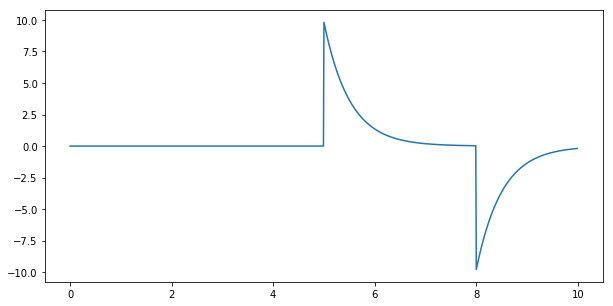

In [13]:
plt.plot(t,highpass)